<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/cancer_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



In [45]:
# Step 2: Load the dataset
file_path = '/content/Cancer_Data.csv'  # Use the correct path if the file is already in Colab
df = pd.read_csv(file_path)

# Step 3: Check the first few rows of the dataset
print("First few rows of the dataset:\n", df.head())

# Step 4: Check for missing values
print("\nMissing values in the dataset:\n", df.isnull().sum())



First few rows of the dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimet

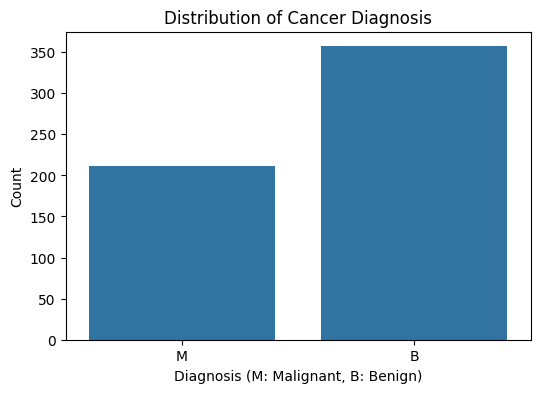

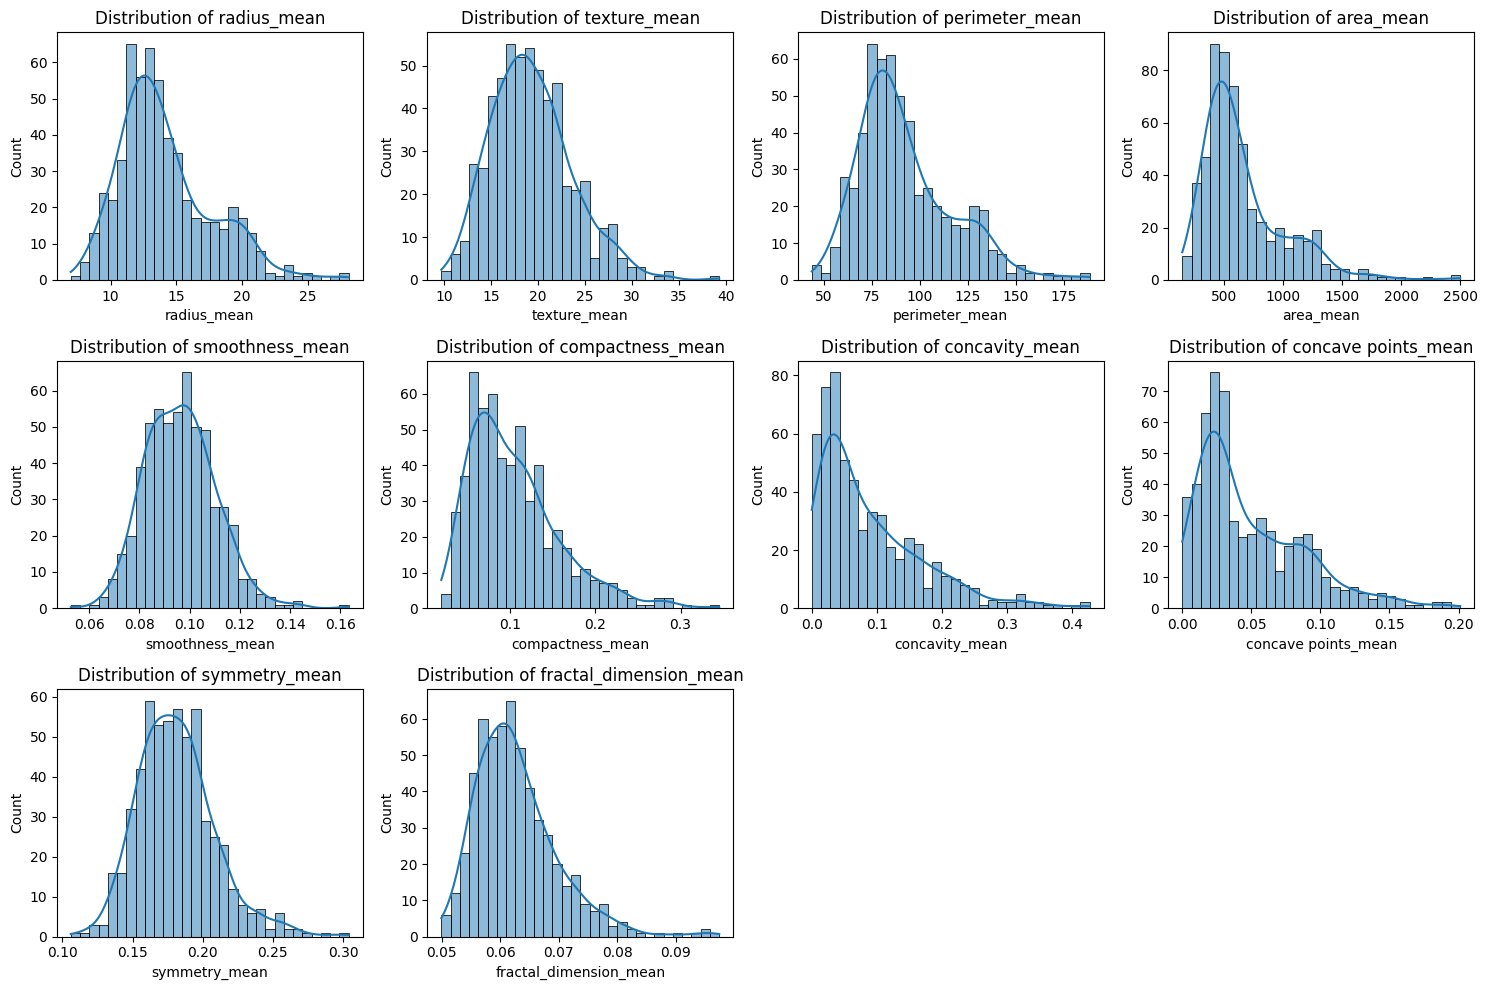

In [46]:
# Step 5: Exploratory Data Analysis (EDA)
# Distribution of target variable 'diagnosis'
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis (M: Malignant, B: Benign)')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of some numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[2:12]):  # Skip 'id' and 'diagnosis' for this plot
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()



Data types of the dataset:
 id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst         

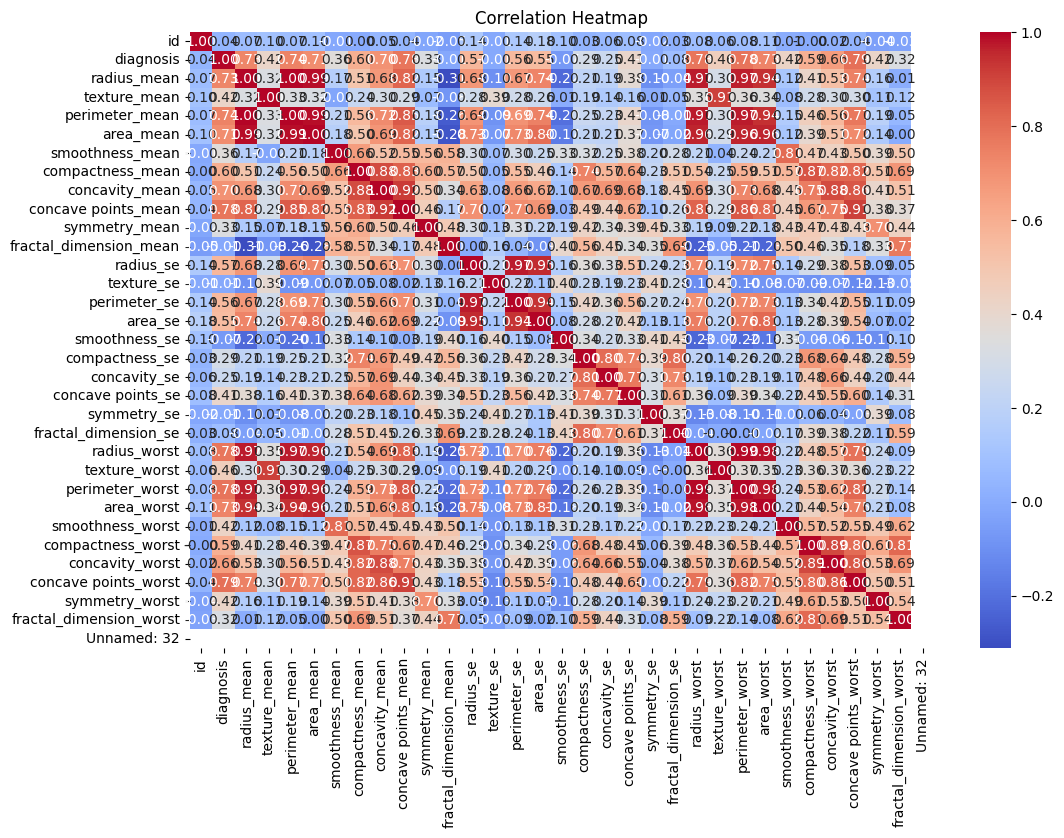

In [47]:
# Step 6: Preprocess the data
# Convert the diagnosis column to a binary variable: 1 for Malignant (M), 0 for Benign (B)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check the data types to ensure all columns are numeric
print("\nData types of the dataset:\n", df.dtypes)

# Define features (X) and target (y)
X = df.drop(columns=['id', 'diagnosis'])  # Drop 'id' and 'diagnosis' columns from features
y = df['diagnosis']

# Convert all features to numeric and handle any conversion errors
X = X.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
print("\nCheck for non-numeric values in features:\n", X.isnull().sum())

# Check if any features contain NaN values (from non-numeric conversion)
if X.isnull().values.any():
    print("There are NaN values in the features. Filling NaNs with 0.")
    X.fillna(0, inplace=True)  # Optionally fill NaN values with 0 or handle as needed

# Now, create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Step 8: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: (455, 31)
Testing set size: (114, 31)


In [49]:
# Step 9: Create SVM model
svm_model = SVC(random_state=42)

# Step 10: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [50]:
# Step 11: Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of SVM model:", accuracy)




Accuracy of SVM model: 0.9824561403508771



Confusion Matrix for SVM:
 [[71  0]
 [ 2 41]]


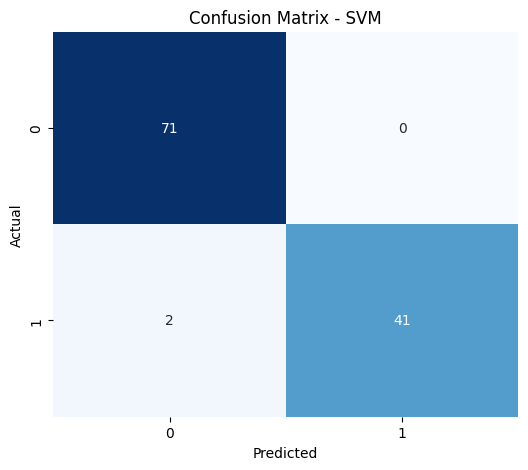

In [51]:
# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for SVM:\n", cm)

# Step 13: Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [52]:
# Step 14: Show Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

